<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Береги-уровень-значимости-с-молоду" data-toc-modified-id="Береги-уровень-значимости-с-молоду-1">Береги уровень значимости с молоду</a></span><ul class="toc-item"><li><span><a href="#Песнь-льда-и-пламени" data-toc-modified-id="Песнь-льда-и-пламени-1.1">Песнь льда и пламени</a></span></li><li><span><a href="#Формализация-задачи:" data-toc-modified-id="Формализация-задачи:-1.2">Формализация задачи:</a></span><ul class="toc-item"><li><span><a href="#Коррекция-Бонферрони" data-toc-modified-id="Коррекция-Бонферрони-1.2.1">Коррекция Бонферрони</a></span></li><li><span><a href="#Метод-Холма" data-toc-modified-id="Метод-Холма-1.2.2">Метод Холма</a></span></li><li><span><a href="#Метод-Бенджамини-Хохберга" data-toc-modified-id="Метод-Бенджамини-Хохберга-1.2.3">Метод Бенджамини-Хохберга</a></span></li></ul></li></ul></li><li><span><a href="#Сколько-нужно-наблюдений" data-toc-modified-id="Сколько-нужно-наблюдений-2">Сколько нужно наблюдений</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-кнопке" data-toc-modified-id="Гипотеза-о-кнопке-2.1">Гипотеза о кнопке</a></span></li><li><span><a href="#Другие-тесты" data-toc-modified-id="Другие-тесты-2.2">Другие тесты</a></span></li><li><span><a href="#Кривые-мощности" data-toc-modified-id="Кривые-мощности-2.3">Кривые мощности</a></span></li></ul></li><li><span><a href="#Бутстрап" data-toc-modified-id="Бутстрап-3">Бутстрап</a></span><ul class="toc-item"><li><span><a href="#Д.И.-для-среднего-(пример-про-копилку)" data-toc-modified-id="Д.И.-для-среднего-(пример-про-копилку)-3.1">Д.И. для среднего (пример про копилку)</a></span><ul class="toc-item"><li><span><a href="#Д.И.-Эфрона" data-toc-modified-id="Д.И.-Эфрона-3.1.1">Д.И. Эфрона</a></span></li><li><span><a href="#Д.И.-Холла" data-toc-modified-id="Д.И.-Холла-3.1.2">Д.И. Холла</a></span></li><li><span><a href="#t-процентильный-Д.И." data-toc-modified-id="t-процентильный-Д.И.-3.1.3">t-процентильный Д.И.</a></span></li></ul></li><li><span><a href="#Д.И.-для-медианы-(цитаты-и-репосты)" data-toc-modified-id="Д.И.-для-медианы-(цитаты-и-репосты)-3.2">Д.И. для медианы (цитаты и репосты)</a></span></li></ul></li></ul></div>

#  Береги уровень значимости с молоду

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from tqdm import tqdm as tqdm_botebook

plt.style.use('ggplot')

## Песнь льда и пламени

Говорят, Джордж Р.Р. Мартин, автор цикла "Песнь Льда и Пламени", истребляет Старков: чаще убивает персонажей, относящихся к этому дому, чем персонажей других домов. В таблице ниже приведено количество персонажей, относящихся к тому или иному дому, упомянутых за первые $4$ книги, а так же количество погибших персонажей.

| Дом | Упомянутые персонажи | Погибшие персонажи |
|-----|---------------------|------|
|House Stark	| 70 | 25 |
|House Lannister | 38 | 7 |
|House Greyjoy | 41 | 12 |
|Night's Watch |105 | 41 |

Нужно проверить гипотезу об этом на $5\%$ уровне значимости. 

## Формализация задачи:

Нам нужно проверить гипотезу о том, что доля смертей среди Старков совпадает со всеми остальными долями против альтернативы, что хотя бы в одной из ситуаций смертность в доме Старков больше:

\begin{equation*}
\begin{aligned} 
& H_0: p_S = p_L = p_G = p_{NW}  \\
& H_1: \text{хотя бы одна вероятность отличается для дома Старков в большую сторону}  
\end{aligned}
\end{equation*}

Протестируем все гипотезы без коррекции на множественное тестирование, а потом введём её. 

In [2]:
n_st = 70 
m_st = 25

n_lan = 38
m_lan = 7

n_gr = 41
m_gr = 12 

n_nw = 105
m_nw = 41 

alpha = 0.05

In [3]:
m_st/n_st, m_lan/n_lan, m_gr/n_gr, m_nw/n_nw

(0.35714285714285715,
 0.18421052631578946,
 0.2926829268292683,
 0.3904761904761905)

Проверяем три гипотезы!

In [4]:
from statsmodels.stats.proportion import proportions_ztest

_, p1 =  proportions_ztest((m_st, m_lan), 
                           (n_st, n_lan), 
                           value=0, 
                           alternative='larger')


_, p2 =  proportions_ztest((m_st, m_gr), 
                           (n_st, n_gr), 
                           value=0, 
                           alternative='larger')

_, p3 =  proportions_ztest((m_st, m_nw),
                           (n_st, n_nw), 
                           value=0,
                           alternative='larger')

pval = np.array([p1, p2, p3])
pval

array([0.03008672, 0.24343199, 0.67209806])

In [5]:
pval < alpha # без коррекции, TRUE - отвергается

array([ True, False, False])

Самая первая гипотеза отвергается. Отсюда делаем вывод, что смертность значимо различается. Помним, что ошибка первого рода - ошибочный выбор альтернативы. В случае, когда мы никак не контролируем уровень значимости она оказывается завышена. Посмотрим, что будет происходить при корекции. 

### Коррекция Бонферрони

In [6]:
pval < alpha/3  # поделили уровень значимости на число гипотез :) 

array([False, False, False])

In [7]:
from statsmodels.sandbox.stats.multicomp import multipletests 

rejected, p_corrected, _, _ = multipletests(pval, 
                                            alpha = alpha, 
                                            method = 'bonferroni') 
p_corrected

array([0.09026015, 0.73029598, 1.        ])

In [8]:
rejected

array([False, False, False])

In [9]:
# rejected
p_corrected < alpha # TRUE - отвергается

array([False, False, False])

Все три гипотезы о равенстве смертностей не отвергаются.

### Метод Холма

In [10]:
rejected, p_corrected, _, _ = multipletests(pval, 
                                            alpha = alpha, 
                                            method = 'holm') 
p_corrected

array([0.09026015, 0.48686399, 0.67209806])

In [11]:
rejected

array([False, False, False])

In [10]:
p_corrected > alpha # TRUE - не отвергается

array([ True,  True,  True])

In [11]:
correction = np.arange(3,0,-1)
pval * correction

array([0.09026015, 0.48686399, 0.67209806])

In [12]:
correction

array([3, 2, 1])

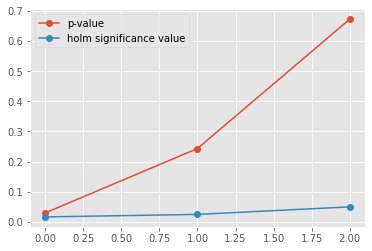

In [13]:
plt.plot(pval, 'o-',label='p-value')
plt.plot(alpha/correction, 'o-', label='holm significance value')
plt.legend()
plt.show()

Все три гипотезы о равенстве смертностей не отвергаются.

### Метод Бенджамини-Хохберга

In [12]:
rejected, p_corrected, _, _ = multipletests(pval, 
                                            alpha = alpha,
                                            method = 'fdr_bh') 
p_corrected

array([0.09026015, 0.36514799, 0.67209806])

In [13]:
rejected

array([False, False, False])

In [15]:
pval

array([0.03008672, 0.24343199, 0.67209806])

In [16]:
p_corrected > 0.05 # TRUE - не отвергается

array([ True,  True,  True])

In [17]:
correction = np.arange(1,4,1)/3
pval / correction

array([0.09026015, 0.36514799, 0.67209806])

In [18]:
correction

array([0.33333333, 0.66666667, 1.        ])

Все три гипотезы о равенстве смертностей не отвергаются. В пакете есть и другие методы коррекции.

https://xkcd.com/882/

![](https://imgs.xkcd.com/comics/significant.png)

# Бутстрап

* [Статья про бустрэп от Станислава Анатольева](http://quantile.ru/03/03-SA.pdf)
* [Неплохая статья про бутстрап в R, на основе которой делалась тетрадка](https://moderndive.com/8-confidence-intervals.html)

Если знаем теоретическое распределение:

In [24]:
distr = stats.lognorm(s=0.8)

In [37]:
N = 1000 # количество выборок
n = 100 # размер одной выборки
medians = []
for _ in range(N):
    medians.append(np.median(distr.rvs(n)))

In [38]:
np.array(medians).var()

0.0949414315042544

In [39]:
# одной строкой
np.median(distr.rvs((N, n)), axis=1).var()

0.09921099974166503

In [26]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Д.И. для среднего (пример про копилку)



![](https://d33wubrfki0l68.cloudfront.net/fe3d13cf8652057fd5ea97fc4d7db1f00b2b1f34/62975/images/sampling/pennies/deliverable/3.jpg)

Мой отец завёл себе копилку и собирает десятирублёвые монеты. Мне стало интересно как именно распределён возраст этих монет.

Я сделал из копилки случайную выборку из сотни десятирублёвых монет и записал дату с каждой в файл `money.csv`.



In [40]:
x = pd.read_csv('money.csv').fielddate.values
x

array([2011, 2017, 2016, 2012, 2017, 2015, 2011, 2015, 2017, 2012, 2019,
       2019, 2012, 2018, 2018, 2018, 2018, 2017, 2018, 2012, 2010, 2012,
       2012, 2011, 2011, 2012, 2011, 2017, 2017, 2016, 2012, 2012, 2017,
       2017, 2012, 2010, 2018, 2016, 2011, 2017, 2012, 2017, 2013, 2017,
       2010, 2011, 2018, 2015, 2011, 2018, 2012, 2013, 2009, 2017, 2017,
       2018, 2019, 2018, 2011, 2013, 2011, 2013, 2017, 2018, 2011, 2012,
       2018, 2012, 2019, 2018, 2011, 2017, 2019, 2019, 2019, 2012, 2011,
       2013, 2011, 2017, 2013, 2013, 2017, 2017, 2017, 2011, 2019, 2013,
       2017, 2012, 2009, 2010, 2010, 2020, 2019, 2020, 2020, 2019, 2018,
       2020])

In [41]:
x = 2022 - x # перешли к возрасту
x

array([11,  5,  6, 10,  5,  7, 11,  7,  5, 10,  3,  3, 10,  4,  4,  4,  4,
        5,  4, 10, 12, 10, 10, 11, 11, 10, 11,  5,  5,  6, 10, 10,  5,  5,
       10, 12,  4,  6, 11,  5, 10,  5,  9,  5, 12, 11,  4,  7, 11,  4, 10,
        9, 13,  5,  5,  4,  3,  4, 11,  9, 11,  9,  5,  4, 11, 10,  4, 10,
        3,  4, 11,  5,  3,  3,  3, 10, 11,  9, 11,  5,  9,  9,  5,  5,  5,
       11,  3,  9,  5, 10, 13, 12, 12,  2,  3,  2,  2,  3,  4,  2])

Посмотрим как распределён возраст. 

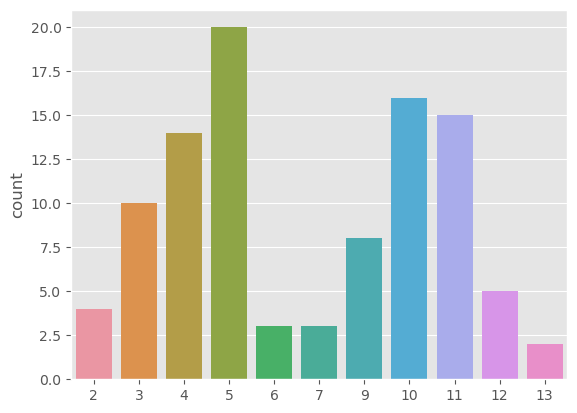

In [42]:
sns.countplot(x=x);

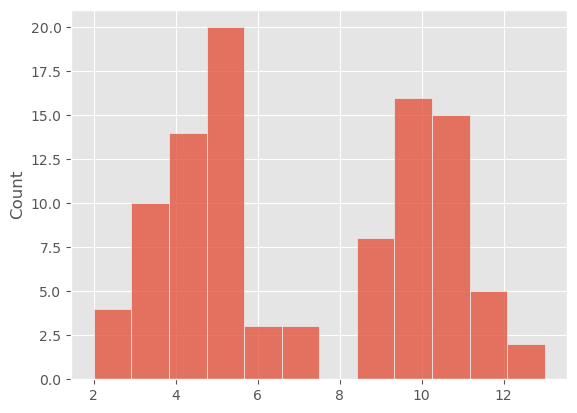

In [43]:
sns.histplot(x, bins=12);

In [44]:
x.shape

(100,)

In [45]:
np.random.choice(x, 100, replace=True)

array([ 5,  3, 13,  4,  2,  5,  5,  5,  7, 11,  3, 12, 10,  5, 11, 11,  4,
       10, 12, 11, 11, 10,  5,  3,  4,  5, 10,  4,  5,  4,  5, 10,  5,  5,
        5,  4, 10,  3, 10,  5,  3, 11,  5, 11,  7,  3,  5,  5,  3,  5,  5,
       11, 12,  5,  4,  3, 13,  4,  4, 10, 11, 10,  4,  5,  5,  9,  4, 10,
        2, 11,  2,  5,  3,  5, 10,  5,  5,  5,  5, 10,  7, 11,  3, 10,  5,
       11,  7, 10, 10, 10,  9, 10,  5,  3,  3,  3, 10, 11,  3,  4])

Это бутстреповская выборка. Для наглядности, другой пример:

*Хотим посчитать дисперсию выборочной медианы для выборки* `a`

In [46]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
np.random.choice(a, 10, replace=True)

array([10,  1,  8,  7,  8,  2, 10,  9,  4,  7])

In [53]:
B = 1000
medians = []
medians_bootstrap_Hall = []
for _ in range(B):
    # Эфрон
    medians.append(np.median(np.random.choice(a, 10, replace=True)))
    medians_bootstrap_Hall.append(np.median(np.random.choice(a, 10, replace=True)) - np.median(a))

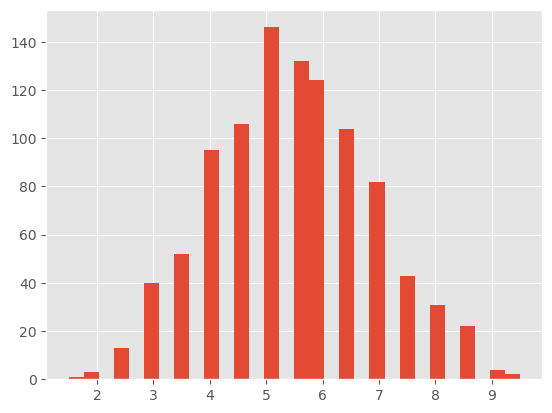

In [50]:
plt.hist(medians, bins=30);

In [52]:
np.var(medians)

1.94676775

Распределение оказывается нестандартным. Видно, что у него есть две моды. Посмотрим на средний возраст монет.

In [31]:
x.mean()

7.16

In [32]:
np.median(x)

6.0

Интересно было бы построить для этого среднего доверительный интервал. Сделаем это с помощью бустрапа.

Напишем функцию для бустрапирования.

In [61]:
def get_bootstrap_sample(x, B_sample=1):
    if B_sample == 1:
        sample = x.ravel()
    else:
        N = x.size
        sample = np.random.choice(x, size=(N, B_sample), replace=True)
    return sample
    
x_boot = get_bootstrap_sample(x, B_sample=2)
x_boot = x_boot[:,0]

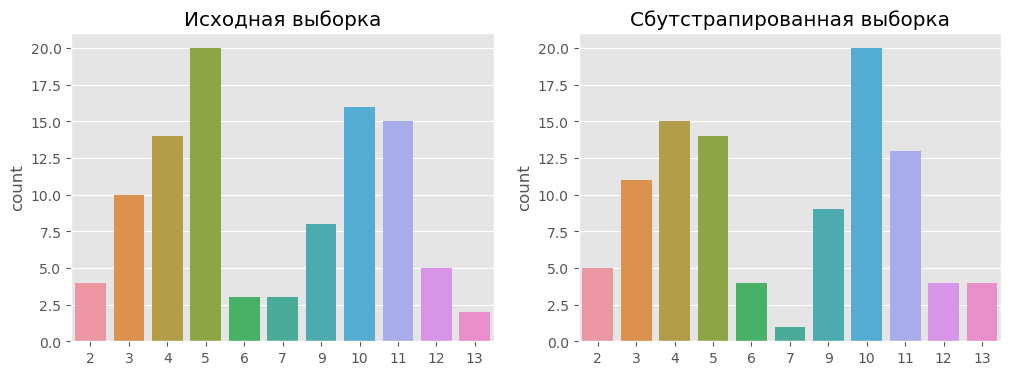

In [62]:
_, axes = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(x=x, ax=axes[0])
sns.countplot(x=x_boot, ax=axes[1])
axes[0].set_title("Исходная выборка")
axes[1].set_title("Сбутстрапированная выборка");

Сгенерируем выборку из средних.

In [63]:
# генерируем 1 миллион выборок размера 100
x_boot = get_bootstrap_sample(x, B_sample=10**6)
x_boot.shape

(100, 1000000)

In [64]:
x_boot_m = np.mean(x_boot, axis=0)
x_boot_m

array([7.07, 7.61, 7.39, ..., 7.35, 7.09, 7.58])

In [65]:
x_boot_m.shape

(1000000,)

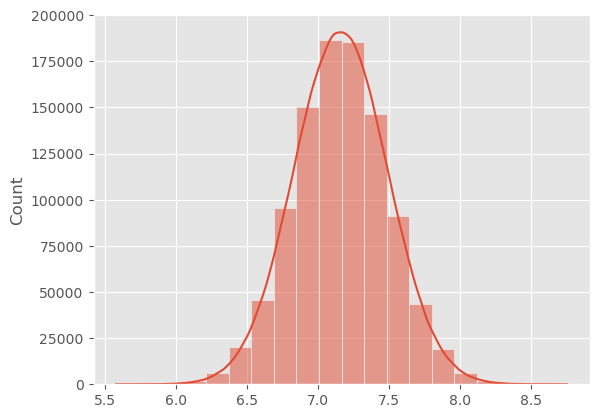

In [66]:
sns.histplot(x_boot_m, bins=20, kde=True);

Сравним получившееся распределение с нормальным. Они оказываются похожи. Это связано с тем, что мы бустрапируем среднее, в возрасте монет нет выбросов, поэтому тут хорошо работает ЦПТ. 

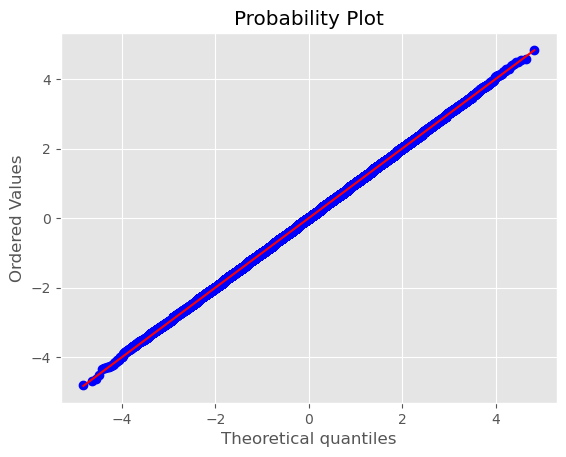

In [67]:
x_scale = (x_boot_m - x_boot_m.mean())/x_boot_m.std()
stats.probplot(x_scale, dist="norm", plot=plt);

### Д.И. Эфрона

Построим доверительный интервал для среднего. 

In [68]:
alpha = 0.05

# посчитали 1 миллион средних по каждой из бутстраппированных выборок
x_boot_m = np.mean(x_boot, axis=0)

lower = np.quantile(x_boot_m, alpha/2)
upper = np.quantile(x_boot_m, 1-alpha/2)
lower, upper

(6.52, 7.81)

In [69]:
upper-lower

1.29

In [70]:
d = 1.96*(x.var(ddof=1)/x.size)**0.5
x.mean() - d, x.mean() + d

(6.512801163677365, 7.807198836322636)

In [71]:
2*d

1.2943976726452715

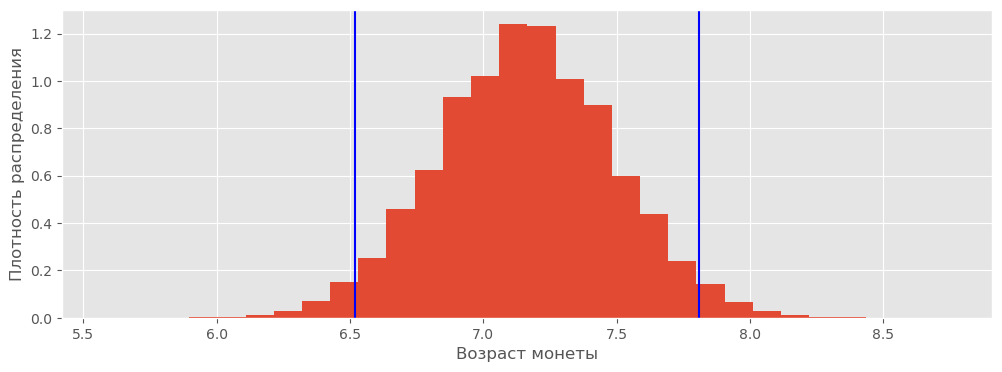

In [72]:
fig = plt.figure(figsize=(12,4))
plt.hist(x_boot_m, bins=30, density=True)
plt.axvline(lower, color='b')
plt.axvline(upper, color='b');

plt.xlabel('Возраст монеты')
plt.ylabel('Плотность распределения');

### Д.И. Холла

In [75]:
alpha = 0.05

# сначала фиксируем глобальное среднее по всей выборке
theta_hat = np.mean(x)

x_boot = get_bootstrap_sample(x, B_sample=10**6)

# центрируем с помощью глобального среднего
x_boot_centered = x_boot - theta_hat

# снова считаем статистику по центрированным бутстраппированным выборкам
bias_boot = np.mean(x_boot_centered, axis=0)


# считаем квантили и вычитаем/прибавляем от глобальгого среднего
lower = theta_hat - np.quantile(bias_boot, 1-alpha/2)
upper = theta_hat - np.quantile(bias_boot, alpha/2)

lower, upper

(6.51, 7.799999999999999)

In [76]:
upper - lower

1.2899999999999991

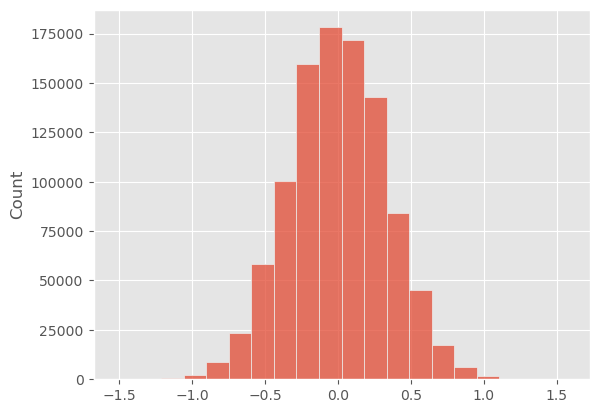

In [77]:
sns.histplot(bias_boot, bins=20);

###  t-процентильный Д.И.

In [78]:
# сначала фиксируем глобальное среднее и выборочную дисперсию по всей выборке
theta_hat = np.mean(x)
std_hat = np.std(x)

# делаем бутстрап-выборки
x_boot = get_bootstrap_sample(x, B_sample=10**6)

# центрируем (вычитаем глобальное среднее)
x_boot_centered = x_boot - theta_hat
x_boot_t = np.mean(x_boot_centered, axis=0)

# считаем ст. отклонение по каждой бутстрап-выборке
x_boot_std = np.std(x_boot, axis=0)
# стандартизуем
x_boot_t /= x_boot_std


lower = theta_hat - np.abs(np.quantile(x_boot_t, alpha/2))*std_hat
upper = theta_hat + np.abs(np.quantile(x_boot_t, 1-alpha/2))*std_hat
lower, upper

(6.497467897530569, 7.810772179121677)

In [79]:
upper - lower

1.3133042815911073

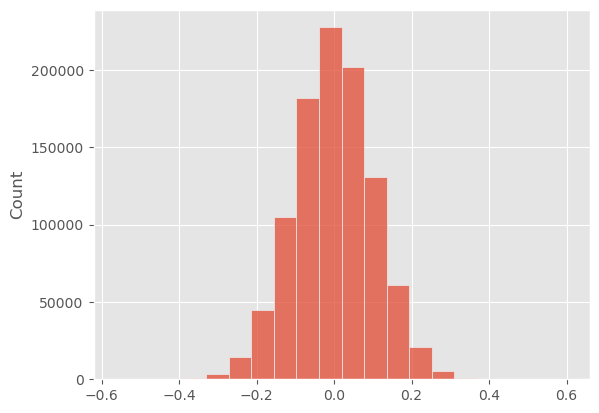

In [80]:
sns.histplot(x_boot_t, bins=20);

Последний доверительный интервал получился пошире. [Теория показывает,](http://quantile.ru/03/03-SA.pdf) что последний способ даёт более низкую ошибку в плане асимптотики. 

## Д.И. для медианы (цитаты и репосты)

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её не грех репостнуть на стеночку. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она получит лайк повышается. Например, цитату 

> Можно простить человеку все, кроме отсутствия. (Экзюпери) 

мне не очень хотелось бы лайкать. А вот цитата 

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков) 

совершенно другое дело. 

В табличке `df_vk_wise` лежат даныне о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено и будем работать с остатками. 

In [51]:
df = pd.read_csv('../data/df_vk_wise.csv')
df['likes1'] = df['likes'] + 1
df.head()

,likes,reposts,text,I,likes1
0,7,0,Кому удобнее следить за новостями М. в инстагр...,False,8
1,575,25,"Если девушка невероятно хороша в юности, но ра...",False,576
2,509,57,"То была очень обычная узость мышления - те, кт...",False,510
3,542,15,"Когда он знакомил меня с Сергеем, тот спросил:...",False,543
4,949,59,"- Общепризнано, сэр, что физические упражнения...",False,950


Построим гистограмму для числа репостов постов, содержащих личные местоимения и не содержащих.

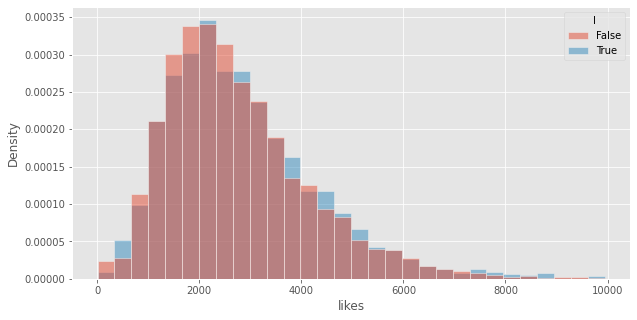

In [52]:
plt.figure(figsize=(10,5))
sns.histplot(df.query('likes<10000'), 
             x='likes', 
             hue='I', 
             bins=30,
             common_norm=False, 
             stat='density',
            );

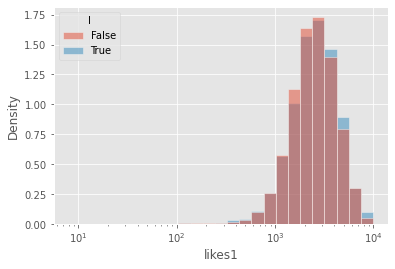

In [53]:
sns.histplot(df.query('likes<10000'), 
             x='likes1', 
             hue='I', 
             bins=25,
             common_norm=False, 
             stat='density',
             log_scale=True
            );

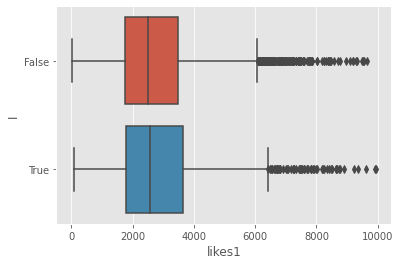

In [54]:
sns.boxplot(data=df.query('likes<10000'), 
             x='likes1', 
             y='I', orient='h'
            );

In [55]:
x = df[df['I']== True]['likes'].values
y = df[df['I']== False]['likes'].values

In [56]:
np.median(x), np.median(y)

(2580.5, 2490.0)

Хвосты на гистограммах оказываются очень длинными. У нас есть выбросы. Смотреть на средние, чтобы сравнить между собой разные цитаты, будет некорректно. Будем смотреть на медианы. Построим доверительный интервал для разности медиан.

In [57]:
x_boot = get_bootstrap_sample(x, B_sample=10**4)
x_boot = np.median(x_boot, axis=0)

y_boot = get_bootstrap_sample(y, B_sample=10**4)
y_boot = np.median(y_boot, axis=0)

In [58]:
def stat_intervals(boot, alpha=0.05):
    lower = np.quantile(boot, alpha/2)
    upper = np.quantile(boot, 1-alpha/2)
    return lower, upper

In [59]:
stat_intervals(x_boot)

(2516.0, 2658.0)

In [60]:
stat_intervals(y_boot)

(2457.0, 2526.0)

Доверительные интервалы пересекаются. Но делать вывод лучше по доверительному интервалу для разности. Такая процедура будет мощнее. 

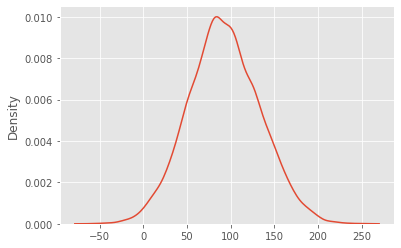

In [61]:
sns.kdeplot(x_boot - y_boot);

In [62]:
stat_intervals(x_boot - y_boot)

(14.0, 174.0)

Ноль не попадает в доверительный интервал, значит на уровне значимость $5\%$ разница есть. На последок посмотрим на вероятность того, что разность больше нуля.

In [63]:
np.mean(x_boot - y_boot > 0)

0.9904

In [64]:
np.mean(x_boot - y_boot < 0)

0.0093

<center>
<img src="https://i.ibb.co/9GWXGh4/image.png" height="300" width="700"> 
</center>